In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd 'gdrive/My Drive/DSF Project: Retail/'

/content/gdrive/My Drive/DSF Project: Retail


In [0]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import warnings
import seaborn as sns

# **RFM Analysis**

In [0]:
columns = ['Date','Transaction Time','Customer Number','Receipt Number','Item Number','Item Description','Net Sales']

In [5]:
train_RFM = pd.read_csv(r'costello_ace_2017-2018.csv',usecols= columns)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
import gc
gc.collect()

0

In [7]:
train_RFM.shape

(17328044, 7)

In [8]:
train_RFM.tail(50)

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales
17327994,9/30/2018,18:07:47,*1272,H88639,7104888,TRAP SPIDER & CRICKET PK,13.98
17327995,9/30/2018,18:07:47,*1272,H88639,CC1082,$5 OFF,-5
17327996,9/30/2018,18:07:52,600065,J97605,1203785,CLEANR KABOOM TLEGRT32OZ,4.87
17327997,9/30/2018,18:07:52,600065,J97605,1361302,CLEANR BATHROOM 20OZ SB,4.45
17327998,9/30/2018,18:07:52,600065,J97605,45029,LINER MAGNTC 70X71 CLEAR,1.7
17327999,9/30/2018,18:08:26,500268,H34196,6187025,ACE BAG 13GAL 22CT DRAW,3.36
17328000,9/30/2018,18:08:45,*5,H88640,5326053,WALLBOARD ANC KIT 21NC#8,19.99
17328001,9/30/2018,18:08:45,*5,H88640,30205,BATTRY ALKLN DURA 9V CD2,10.49
17328002,9/30/2018,18:09:20,372546,E13888,S3739,60 WATT CL APPLIANCE BULB,8.97
17328003,9/30/2018,18:09:20,372546,E13888,7415110,FLYING INSECT KLLR18OZ,0


**Data Preprocessing**

In [9]:
train_RFM.isna().sum()

Date                 0
Transaction Time     1
Customer Number     63
Receipt Number       1
Item Number          1
Item Description     1
Net Sales            1
dtype: int64

In [0]:
train_RFM = train_RFM.drop(train_RFM.loc[train_RFM['Customer Number'].isnull()].index) # Removing all record with NaN value


In [11]:
train_RFM.isna().sum()

Date                0
Transaction Time    0
Customer Number     0
Receipt Number      0
Item Number         0
Item Description    0
Net Sales           0
dtype: int64

In [12]:
train_RFM.tail(20)

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales
17328023,9/30/2018,18:17:28,145989,H88641,B01271XH,COLOR SAMPLE BM BASE1 PT,6.99
17328024,9/30/2018,18:17:28,145989,H88641,1515014,STAIN MINWX8OZ WTHRD OAK,7.99
17328025,9/30/2018,18:17:28,145989,H88641,12389,STAIN MINWX 8OZ DRFTWOOD,7.99
17328026,9/30/2018,18:17:30,297854,B52085,AR47070,REVENGE RAT TRAP,2.99
17328027,9/30/2018,18:17:30,297854,B52085,70737,TRAP RAT VICTOR,3.99
17328028,9/30/2018,18:17:30,297854,B52085,5333075,ANCHOR 10-12W/WH SCRWCD4,2.69
17328029,9/30/2018,18:17:30,297854,B52085,1011006,JNT CMPND ALL PURP 1.75P,5.99
17328030,9/30/2018,18:17:30,297854,B52085,1504125,GOO GONE REMOVER 2OZ,2.99
17328031,9/30/2018,18:17:30,297854,B52085,9269862,CMN Donations,1
17328032,9/30/2018,18:19:37,442546,B02346,7055973,ADJUSTABLE FLAG BRACKET,17.99


In [0]:
#train_RFM['Date'] = train_RFM['Date'].astype('str')

In [0]:
train_RFM=train_RFM.sort_values(by = ['Date'])

In [0]:
size = train_RFM.shape[0]-25
train_RFM = train_RFM[0:size]

In [0]:

train_RFM['Date'] = pd.to_datetime(train_RFM['Date'])
#train_RFM['year'] = train_RFM['Date'].dt.year


In [0]:
train_RFM['year'], train_RFM['months'] = train_RFM['Date'].dt.year, train_RFM['Date'].dt.month

In [18]:
train_RFM

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5868993,2017-01-01,15:54:38,30247,B15056,6237762,GLAD FORCEFLEX BLK 50CT,12.74,2017,1
5863918,2017-01-01,14:26:52,233070,A15017,30733,"BOX SGL GNG PVC OW 14CU""",1.99,2017,1
5863919,2017-01-01,14:26:52,*5,I29245,PSWITCH832,LED NIGHT LIGHT SWITCH 2PK,11.24,2017,1
5863920,2017-01-01,14:26:52,233070,A15017,3202181,BLANK WALLPLATE 1G WHITE,0.99,2017,1
5863921,2017-01-01,14:26:52,233070,A15017,33180,TAPE ELECT3/4X60'VYL ACE,0.99,2017,1
...,...,...,...,...,...,...,...,...,...
16867755,2018-09-09,12:05:21,136015,B43393,37009048,"9"" PLASTIC TRAY LINER",1.98,2018,9
16867754,2018-09-09,12:05:21,136015,B43393,18159,PAD REPLACE TRIMLINE2PK,5.49,2018,9
16867753,2018-09-09,12:05:21,136015,B43393,18158,PAINT EDGER,4.99,2018,9
16867752,2018-09-09,12:05:21,136015,B43393,68003060,"3"" TRIM & TOUCH UP ROLLER KIT",4.99,2018,9


In [0]:
train_RFM['months']=train_RFM.months.astype(str).str.zfill(2)


In [20]:
train_RFM.head()

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5868993,2017-01-01,15:54:38,30247,B15056,6237762,GLAD FORCEFLEX BLK 50CT,12.74,2017,01
5863918,2017-01-01,14:26:52,233070,A15017,30733,"BOX SGL GNG PVC OW 14CU""",1.99,2017,01
5863919,2017-01-01,14:26:52,*5,I29245,PSWITCH832,LED NIGHT LIGHT SWITCH 2PK,11.24,2017,01
5863920,2017-01-01,14:26:52,233070,A15017,3202181,BLANK WALLPLATE 1G WHITE,0.99,2017,01
5863921,2017-01-01,14:26:52,233070,A15017,33180,TAPE ELECT3/4X60'VYL ACE,0.99,2017,01


In [0]:
train_RFM['Date']=train_RFM['year'].astype('str') + train_RFM['months']


In [22]:
train_RFM.tail(50)

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
16867800,201809,12:06:06,*5,F84626,7105786,LIQUID ANT BAIT 6PK,6.99,2018,09
16867799,201809,12:06:06,*5,D94255,57063200,"VT TITAN 2"" SHRT CT TRIM BSH",6.99,2018,09
16867798,201809,12:06:04,*5,G47821,10704,OIL MULTI-PURP 3IN1 3OZ,4.99,2018,09
16867797,201809,12:06:04,*5,G47821,70723,TWINE TW NYLON #18X525GD,10.49,2018,09
16867796,201809,12:06:04,*5,G47821,81355,"FUNNEL FLEXIBLE 11""",4.49,2018,09
16867795,201809,12:06:03,*A32VT,D32949,3435,CWB ORANGE SNITZ,1.79,2018,09
16867794,201809,12:06:03,*A32VT,D32949,8207433,HICKORY BBQ PELLETS 20LB,19.99,2018,09
16867793,201809,12:06:03,*A32VT,D32949,8306540,PECAN BBQ PELLETS 20LB,19.99,2018,09
16867792,201809,12:05:59,117005,J44340,9247289,HIGHLIGHTER FL YLW 2PK,2.99,2018,09
16867791,201809,12:05:59,117005,J44340,UT3PK,3PK UTILITY LIGHTER,5.99,2018,09


In [23]:
train_RFM.isna().sum()

Date                0
Transaction Time    0
Customer Number     0
Receipt Number      0
Item Number         0
Item Description    0
Net Sales           0
year                0
months              0
dtype: int64

In [0]:
train_RFM['Net Sales'] = train_RFM['Net Sales'].astype('str')

In [0]:
train_RFM['Net Sales'] = train_RFM['Net Sales'].replace(',', '')

In [0]:
train_RFM = train_RFM[pd.to_numeric(train_RFM['Net Sales'], errors='coerce').notnull()]

In [27]:
train_RFM['Net Sales']=train_RFM['Net Sales'].astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
train_RFM.isna().sum()

Date                0
Transaction Time    0
Customer Number     0
Receipt Number      0
Item Number         0
Item Description    0
Net Sales           0
year                0
months              0
dtype: int64

Total Number of Customers

In [29]:
Cust=train_RFM[['Customer Number']].drop_duplicates()
print ("No of customers are :" , len(Cust))
#Cust_country=train_RFM[['Country','CustomerID']].drop_duplicates()
Cust_freq=train_RFM[['Receipt Number','Customer Number']].drop_duplicates()

No of customers are : 349280


**Frequency Flag**

In [0]:
Cust_freq=train_RFM[['Receipt Number','Customer Number']].drop_duplicates()
#Cust_freq_count = Cust_freq.groupby(["Customer Number"])["Receipt Number"].aggregate("count").\
#reset_index().sort_values(by='Receipt Number', ascending=False)
#Cust_freq_count_UK=Cust_freq_count[Cust_freq_count['Country']=="United Kingdom"]

In [31]:
Cust_freq

,Receipt Number,Customer Number
5868993,B15056,30247
5863918,A15017,233070
5863919,I29245,*5
5863927,E79230,*27144
5863929,I88880,106492
...,...,...
16867749,I85200,1511
16867761,H79271,131626
16867759,E18889,9109
16867758,F84624,300014


In [0]:
#Counting Frquency for each Customer
Cust_freq_count = Cust_freq.groupby(["Customer Number"])["Receipt Number"].aggregate("count").\ 
reset_index()   


In [33]:
Cust_freq_count

,Customer Number,Receipt Number
0,*0,56
1,*1,33
2,*10,6
3,*100,5
4,*1000,9
...,...,...
349275,999966,14
349276,99997,26
349277,999977,4
349278,99998,154


In [0]:
Cust_freq_count = Cust_freq_count.sort_values(by='Receipt Number', ascending=False)

In [35]:
Cust_freq_count.head(10)

,Customer Number,Receipt Number
24768,*5,982026
29919,*6,28775
87121,10000,14887
75474,*A96T6,8961
69786,*A739A,8523
87128,100020,7477
349274,99996,6478
7660,*22,5196
7037,*21,4791
65469,*A621Q,3487


In [0]:
unique_invoice=Cust_freq_count[['Receipt Number']].drop_duplicates()


In [37]:
unique_invoice

,Receipt Number
24768,982026
29919,28775
87121,14887
75474,8961
69786,8523
...,...
218297,5
167472,4
304323,3
302684,2


In [0]:
unique_invoice['Frequency_Band'] = pd.qcut(unique_invoice['Receipt Number'], 5)


In [39]:
#Frequency Bands
unique_invoice=unique_invoice[['Frequency_Band']].drop_duplicates()
unique_invoice

,Frequency_Band
24768,"(388.4, 982026.0]"
94237,"(255.8, 388.4]"
337913,"(170.2, 255.8]"
241172,"(85.6, 170.2]"
50821,"(0.999, 85.6]"


In [0]:
def f(row):
    if row['Receipt Number'] <= 85.6:
        val = 1
    elif row['Receipt Number'] > 85.6 and row['Receipt Number'] <= 170.2:
        val = 2
    elif row['Receipt Number'] > 170.2 and row['Receipt Number'] <= 255.8:
        val = 3
    elif row['Receipt Number'] > 255.8 and row['Receipt Number'] <= 388.4:
        val = 4
    else:
        val = 5
    return val

In [0]:
Cust_freq_count['Freq_Flag'] = Cust_freq_count.apply(f, axis=1)


In [42]:
Cust_freq_count

,Customer Number,Receipt Number,Freq_Flag
24768,*5,982026,5
29919,*6,28775,5
87121,10000,14887,5
75474,*A96T6,8961,5
69786,*A739A,8523,5
...,...,...,...
307520,502898,1,1
64395,*A56MW,1,1
64394,*A56MS,1,1
64393,*A56MR,1,1


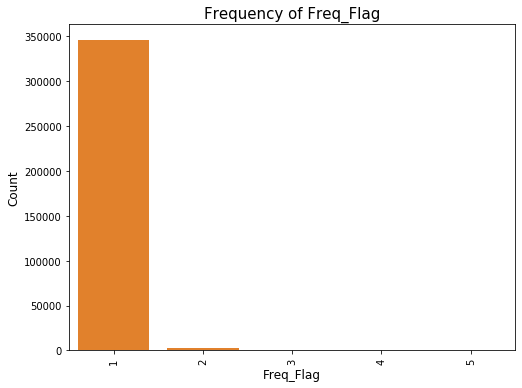

In [43]:
import seaborn as sns
color = sns.color_palette()
plt.figure(figsize=(8,6))

sns.countplot(x="Freq_Flag", data=Cust_freq_count, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Freq_Flag", fontsize=15)
plt.show()

**Recency Flag**

In [44]:
train_RFM.head()

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5868993,201701,15:54:38,30247,B15056,6237762,GLAD FORCEFLEX BLK 50CT,12.74,2017,01
5863918,201701,14:26:52,233070,A15017,30733,"BOX SGL GNG PVC OW 14CU""",1.99,2017,01
5863919,201701,14:26:52,*5,I29245,PSWITCH832,LED NIGHT LIGHT SWITCH 2PK,11.24,2017,01
5863920,201701,14:26:52,233070,A15017,3202181,BLANK WALLPLATE 1G WHITE,0.99,2017,01
5863921,201701,14:26:52,233070,A15017,33180,TAPE ELECT3/4X60'VYL ACE,0.99,2017,01


In [0]:
Cust_date=train_RFM[['Customer Number','Date']].drop_duplicates()


In [46]:
Cust_date

,Customer Number,Date
5868993,30247,201701
5863918,233070,201701
5863919,*5,201701
5863927,*27144,201701
5863929,106492,201701
...,...,...
16867786,232440,201809
16867792,117005,201809
16867735,*21885,201809
16867758,300014,201809


In [47]:
Cust_date.loc[(Cust_date['Customer Number'] == '*5')]

,Customer Number,Date
5863919,*5,201701
6418118,*5,201801
14714253,*5,201710
15350388,*5,201810
13203006,*5,201711
13949713,*5,201811
3184195,*5,201712
4088353,*5,201812
4937520,*5,201702
5422049,*5,201802


In [0]:
Cust_date['Date'] = Cust_date['Date'].astype('int') 

In [0]:
def f2(row):
    if row['Date'] > 201804:
        val = 5
    elif row['Date'] <= 201804 and row['Date'] > 201712:
        val = 4
    elif row['Date'] <= 201712 and row['Date'] > 201708:
        val = 3
    elif row['Date'] <= 201708 and row['Date'] > 201704:
        val = 2
    else:
        val = 1
    return val

In [0]:
Cust_date['Recency_Flag'] = Cust_date.apply(f2, axis=1)


In [0]:
Cust_date = Cust_date.groupby("Customer Number", as_index=False)["Recency_Flag"].max()

In [52]:
Cust_date

,Customer Number,Recency_Flag
0,*0,5
1,*1,5
2,*10,5
3,*100,5
4,*1000,5
...,...,...
349275,999966,3
349276,99997,4
349277,999977,2
349278,99998,5


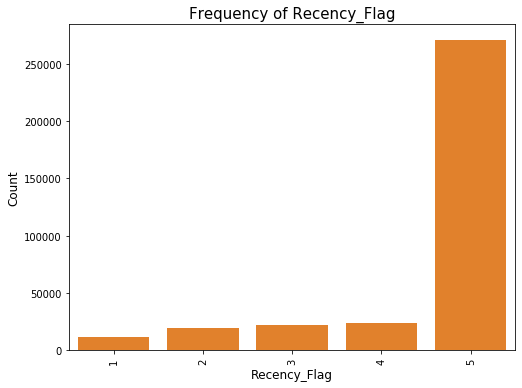

In [53]:
plt.figure(figsize=(8,6))
sns.countplot(x="Recency_Flag", data=Cust_date, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Recency_Flag", fontsize=15)
plt.show()

**Monetary Flag**

In [54]:
gc.collect()

4977

In [55]:
train_RFM.dtypes

Date                 object
Transaction Time     object
Customer Number      object
Receipt Number       object
Item Number          object
Item Description     object
Net Sales           float64
year                  int64
months               object
dtype: object

In [56]:
train_RFM.isna().sum()

Date                0
Transaction Time    0
Customer Number     0
Receipt Number      0
Item Number         0
Item Description    0
Net Sales           0
year                0
months              0
dtype: int64

In [0]:
Cust_monetory = train_RFM.groupby(["Customer Number"])["Net Sales"].aggregate("sum").\
reset_index()#.sort_values(by='Net Sales', ascending=False)


In [0]:
Cust_monetory = Cust_monetory.sort_values(by='Net Sales', ascending=False)

In [59]:
unique_price=Cust_monetory[['Net Sales']].drop_duplicates()
unique_price=unique_price[unique_price['Net Sales'] > 0]
unique_price['monetary_Band'] = pd.qcut(unique_price['Net Sales'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()
unique_price

,monetary_Band
24768,"(807.57, 48857385.73]"
132162,"(454.55, 807.57]"
190562,"(262.42, 454.55]"
130931,"(128.24, 262.42]"
251084,"(-0.000999999999999787, 128.24]"


In [0]:
def f3(row):
    if row['Net Sales'] <= 128.24:
        val = 1
    elif row['Net Sales'] > 128.24 and row['Net Sales'] <= 262.42:
        val = 2
    elif row['Net Sales'] > 262.42 and row['Net Sales'] <= 454.55:
        val = 3
    elif row['Net Sales'] > 454.55 and row['Net Sales'] <= 807.57:
        val = 4
    else:
        val = 5
    return val

In [0]:
Cust_monetory['Monetary_Flag'] = Cust_monetory.apply(f3, axis=1)


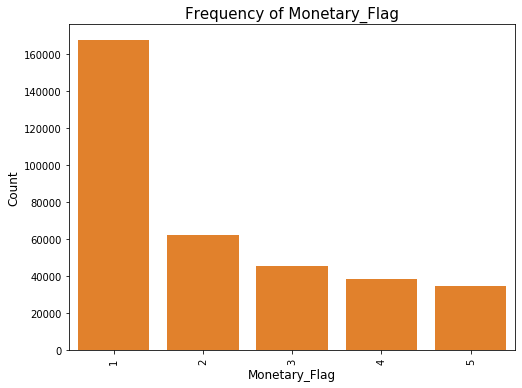

In [62]:
plt.figure(figsize=(8,6))
sns.countplot(x="Monetary_Flag", data=Cust_monetory, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Monetary_Flag", fontsize=15)
plt.show()

**Merging Recency,Frequency and Monetary Flag**

In [63]:
Cust_All=pd.merge(Cust_date,Cust_freq_count[['Customer Number','Freq_Flag']],\
                     on=['Customer Number'],how='left')
Cust_All=pd.merge(Cust_All,Cust_monetory[['Customer Number','Monetary_Flag']],\
                     on=['Customer Number'],how='left')
Cust_All.tail(10)

,Customer Number,Recency_Flag,Freq_Flag,Monetary_Flag
349270,99994,2,1,4
349271,999948,2,1,1
349272,999949,1,1,1
349273,99995,5,1,4
349274,99996,5,5,5
349275,999966,3,1,1
349276,99997,4,1,5
349277,999977,2,1,1
349278,99998,5,2,5
349279,99999,4,1,5


In [64]:
Cust_All.loc[(Cust_All['Customer Number'] == '*5')]

,Customer Number,Recency_Flag,Freq_Flag,Monetary_Flag
24768,*5,5,5,5


**Segmenting Customers on the basis of RFM Scores**

In [65]:
#Champions
Champions = Cust_All.loc[(Cust_All['Recency_Flag'] >=4) & (Cust_All['Freq_Flag'] >= 4) & (Cust_All['Monetary_Flag'] >= 4)]
Champions.shape

(248, 4)

In [66]:
#Loyal_Customers
Loyal_Customers = Cust_All.loc[(Cust_All['Freq_Flag'] >= 4)]
Loyal_Customers.shape

(255, 4)

In [67]:
#Potential_Loyalist
Potential_Loyalist = Cust_All.loc[(Cust_All['Recency_Flag'] ==5) & (Cust_All['Freq_Flag'] != 1 ) & (Cust_All['Monetary_Flag'] == 4)]
Potential_Loyalist.shape

(54, 4)

In [68]:
#Recent Customers
Recent_Customers = Cust_All.loc[(Cust_All['Recency_Flag'] ==5) & (Cust_All['Freq_Flag'] < 5 ) ]
Recent_Customers.shape

(270887, 4)

In [69]:
#Promising
Promising = Cust_All.loc[(Cust_All['Recency_Flag'] ==5) & (Cust_All['Freq_Flag'] >=2 ) & (Cust_All['Freq_Flag'] <=4 ) & (Cust_All['Monetary_Flag'] <= 3 )   ]
Promising.shape

(16, 4)

In [70]:
#Customers_Needing_Attention
Customers_Needing_Attention = Cust_All.loc[(Cust_All['Recency_Flag'] >= 3) &  (Cust_All['Recency_Flag'] < 5) & (Cust_All['Freq_Flag'] >= 2 ) & (Cust_All['Monetary_Flag'] >= 3)]
Customers_Needing_Attention.shape

(26, 4)

In [71]:
#About_To_Sleep
About_To_Sleep = Cust_All.loc[(Cust_All['Recency_Flag'] <=3) & (Cust_All['Freq_Flag'] <= 3 ) & (Cust_All['Monetary_Flag'] <= 3)]
About_To_Sleep.shape

(53609, 4)

In [72]:
#At_Risk
At_Risk = Cust_All.loc[(Cust_All['Recency_Flag'] <=3) & (Cust_All['Freq_Flag'] >= 2 ) & (Cust_All['Monetary_Flag'] >= 2)]
At_Risk.shape

(17, 4)

In [73]:
#Cant_Lose_Them
Cant_Lose_Them = Cust_All.loc[(Cust_All['Recency_Flag'] <=4) & (Cust_All['Freq_Flag'] >= 3 ) & (Cust_All['Monetary_Flag'] >= 3)]
Cant_Lose_Them.shape

(10, 4)

In [74]:
#Hibernating
Hibernating = Cust_All.loc[(Cust_All['Recency_Flag'] <=2) & (Cust_All['Freq_Flag'] <= 2 ) & (Cust_All['Monetary_Flag'] <= 2)]
Hibernating.shape

(31090, 4)

In [75]:
#Lost
Lost = Cust_All.loc[(Cust_All['Recency_Flag'] ==1)& (Cust_All['Freq_Flag'] == 1 ) & (Cust_All['Monetary_Flag'] == 1)]
Lost.shape

(11253, 4)

In [76]:
#spend_thrift_cust
spend_thrift_cust = Cust_All.loc[(Cust_All['Freq_Flag'] == 5)& (Cust_All['Monetary_Flag'] == 5)]
spend_thrift_cust.shape

(100, 4)

In [0]:
customer_segments = ['Champions','Loyal_Customers','Promising','Need_Attention','At_Risk','Cant_Lose_Them']
freq_segments = [Champions.shape[0],Loyal_Customers.shape[0],Promising.shape[0],Customers_Needing_Attention.shape[0],At_Risk.shape[0],Cant_Lose_Them.shape[0]]

In [0]:
data = {'customer_segments' : ['Champions','Loyal_Customers','Promising','Customers_Needing_Attention','At_Risk','Cant_Lose_Them'],
'freq_segments' : [Champions.shape[0],Loyal_Customers.shape[0],Promising.shape[0],Customers_Needing_Attention.shape[0],At_Risk.shape[0],Cant_Lose_Them.shape[0]]}

In [0]:
RFM_seg = pd.DataFrame(data)

In [80]:
RFM_seg

,customer_segments,freq_segments
0,Champions,248
1,Loyal_Customers,255
2,Promising,16
3,Customers_Needing_Attention,26
4,At_Risk,17
5,Cant_Lose_Them,10


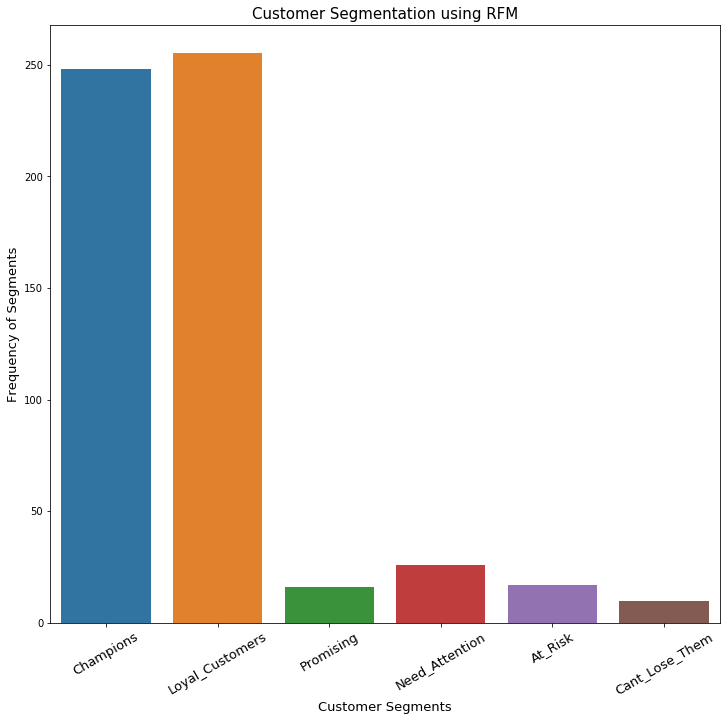

In [106]:
fig2 =plt.figure(figsize=(12,11))
sns.barplot(customer_segments,freq_segments)
plt.ylabel( "Frequency of Segments", fontsize=13)
plt.xlabel('Customer Segments', fontsize=13)
plt.xticks(fontsize=13,rotation=30)
plt.title("Customer Segmentation using RFM", fontsize=15)
plt.show()
fig2.savefig('RFM_barplot.png')

Figure: Customer Segmentation using RFM analysis: Differentitation of Customers on the basis of set of RFM values

In [82]:
Cust_All.shape

(349280, 4)

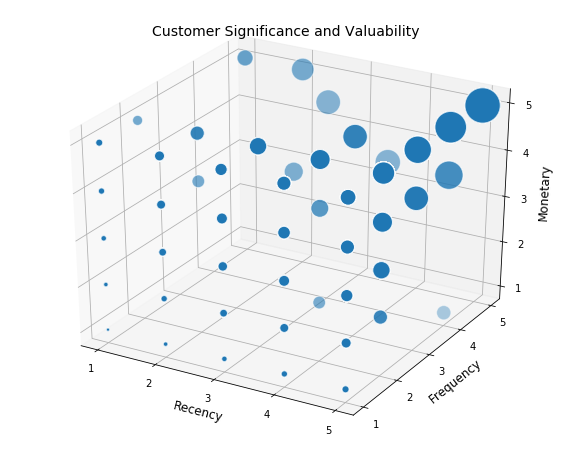

In [83]:
from matplotlib.ticker import MaxNLocator

#ax = plt.figure().gca()
#ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = Cust_All['Recency_Flag']
ys = Cust_All['Freq_Flag']
zs = Cust_All['Monetary_Flag']
volume = xs*ys*zs
sc = ax.scatter(xs, ys, zs, s=volume*10,  edgecolors='white')
#sc = ax.scatter(xs, ys, zs, s=150,  edgecolors='white')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_xlabel('Recency',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)
ax.set_zlabel('Monetary',fontsize=12)
plt.title("Customer Significance and Valuability", fontsize=14)

plt.show()

Figure: Customer Significance and Valuability using RFM analysis: 1. Color Density: Color density is directly proportional to
the Number of Customers with same RFM set values i.e. Darker the colour, more the number of Customers with that
set of RFM value. 2. Size: Customer significance to the store is directly proportional to the size of the bubble i.e. Most
Valuable Customers will have largest bubble with RFM values set of 5,5,5.

In [0]:
fig.savefig('3d_scatter.png')

## **Validation**

In [85]:
train_RFM.head()

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5868993,201701,15:54:38,30247,B15056,6237762,GLAD FORCEFLEX BLK 50CT,12.74,2017,01
5863918,201701,14:26:52,233070,A15017,30733,"BOX SGL GNG PVC OW 14CU""",1.99,2017,01
5863919,201701,14:26:52,*5,I29245,PSWITCH832,LED NIGHT LIGHT SWITCH 2PK,11.24,2017,01
5863920,201701,14:26:52,233070,A15017,3202181,BLANK WALLPLATE 1G WHITE,0.99,2017,01
5863921,201701,14:26:52,233070,A15017,33180,TAPE ELECT3/4X60'VYL ACE,0.99,2017,01


In [86]:
train_RFM.loc[train_RFM['Customer Number'] == '10000']

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5862808,201701,14:04:01,10000,B88766,8211369,CHIMNEY STARTER,17.99,2017,01
6041366,201701,13:46:40,10000,A82760,1335348,CAULK ALEX FDRY WH10.1OZ,7.18,2017,01
6038577,201701,12:10:30,10000,A82756,B055101Q,REG SEL INT S-G WHITE QT,17.59,2017,01
6037625,201701,11:33:29,10000,A82750,B055101Q,REG SEL INT S-G WHITE QT,17.59,2017,01
6037593,201701,11:32:04,10000,A82749,B079201Q,ADVANCE INT SATIN WHT QT,39.98,2017,01
...,...,...,...,...,...,...,...,...,...
16869008,201809,12:32:33,10000,14108,37044806,G-FORCE 6'ROLLING SCAFFOLD,179.99,2018,09
16869007,201809,12:32:33,10000,14108,B050809F,CEILING WB U-FLT WHT 5GL,-405.00,2018,09
16869886,201809,12:51:44,10000,B27102,B05481X,REG SEL INT MATTE BS1 GL,42.39,2018,09
16869887,201809,12:51:44,10000,B27102,61400028,PURDY 9X1/2 WHITE DOVE 3PK,13.49,2018,09


In [87]:
train_RFM['Customer Number'].value_counts()

*5        4967743
*6          60999
10000       39117
*A96T6      22208
100020      21756
           ...   
347728          1
548633          1
549257          1
*AC6MU          1
*A33G6          1
Name: Customer Number, Length: 349280, dtype: int64

In [88]:
train_RFM.loc[train_RFM['Customer Number'] == '10000']['Net Sales'].sum()

1117686.9100000001

In [89]:
Cust_All.loc[(Cust_All['Customer Number'] == '10000')  ]

,Customer Number,Recency_Flag,Freq_Flag,Monetary_Flag
87121,10000,5,5,5


In [90]:
train_RFM.loc[train_RFM['Customer Number'] == '10000']

,Date,Transaction Time,Customer Number,Receipt Number,Item Number,Item Description,Net Sales,year,months
5862808,201701,14:04:01,10000,B88766,8211369,CHIMNEY STARTER,17.99,2017,01
6041366,201701,13:46:40,10000,A82760,1335348,CAULK ALEX FDRY WH10.1OZ,7.18,2017,01
6038577,201701,12:10:30,10000,A82756,B055101Q,REG SEL INT S-G WHITE QT,17.59,2017,01
6037625,201701,11:33:29,10000,A82750,B055101Q,REG SEL INT S-G WHITE QT,17.59,2017,01
6037593,201701,11:32:04,10000,A82749,B079201Q,ADVANCE INT SATIN WHT QT,39.98,2017,01
...,...,...,...,...,...,...,...,...,...
16869008,201809,12:32:33,10000,14108,37044806,G-FORCE 6'ROLLING SCAFFOLD,179.99,2018,09
16869007,201809,12:32:33,10000,14108,B050809F,CEILING WB U-FLT WHT 5GL,-405.00,2018,09
16869886,201809,12:51:44,10000,B27102,B05481X,REG SEL INT MATTE BS1 GL,42.39,2018,09
16869887,201809,12:51:44,10000,B27102,61400028,PURDY 9X1/2 WHITE DOVE 3PK,13.49,2018,09


In [91]:
train_RFM.loc[train_RFM['Customer Number'] == '24805']['Net Sales'].sum()

12.58

In [92]:
Cust_All.loc[(Cust_All['Customer Number'] == '24805')  ]

,Customer Number,Recency_Flag,Freq_Flag,Monetary_Flag
173460,24805,5,1,1


In [0]:
Customer_Number = ['10000','24805']
Recent_Date = ['09/2018','09/2018']
Frequency_of_Shopping = ['39117','1']
Total_Net_sales = ['1117686.91','12.58']
resultDf = pd.DataFrame(list(zip(Customer_Number, Recent_Date,Frequency_of_Shopping,Total_Net_sales)), 
               columns =['Customer Number', 'Recent_Date','Frequency_of_Shopping','Total_Net_sales'])

 Table 1

In [94]:
resultDf

,Customer Number,Recent_Date,Frequency_of_Shopping,Total_Net_sales
0,10000,09/2018,39117,1117686.91
1,24805,09/2018,1,12.58


Table 2

In [95]:
Cust_All.loc[(Cust_All['Customer Number'].isin(['10000','24805']))  ]

,Customer Number,Recency_Flag,Freq_Flag,Monetary_Flag
87121,10000,5,5,5
173460,24805,5,1,1


## **Comparing Results to Validate**

**Recency:**
Our dataset contains latest transactions up to 09/2018 for all the customers. Recent_Date of transaction for both
Customers is from 09/2018 which is under last 4 months. Thus, they should have Recency_Flag score 5 which
we can validate from the table 2.

**Frequency:**
From table 1, Frequency of shopping for Customer Number ’10000’ is greater than the Customer Number ’24805’.
Comparatively, Freq_Flag value for Customer Number ’10000’ should be the highest and for ’24805’ should be
the lowest. Thus, we can validate that from table 2 as Freq_Flag for ’10000’ is 5 and for ’24805’ is 1.

**Monetary:**
Total Net Sales Amount for Customer Number ’10000’ is greater than the Customer Number ’24805’ as shown
in table 1. Comparatively, Monetary_Flag value for Customer Number ’10000’ should be the highest and for
’24805’ should be the lowest. Thus, we can validate that from table 2 as Monetary_Flag for ’10000’ is 5 and for
’24805’ is 1.